# Homework 7

- Tori Garfield teg755
- Veronica Alejandro vaa678

## Supprt Vector Machine 

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [3]:
# Add your code Here! 
df = heart_df[['Age', 'Sex', 'Chol', 'Target']]
df['Target'] = df['Target'].apply(lambda x : 1 if x == 'Yes' else 0)
myX = df[['Age', 'Sex', 'Chol']]
target = df['Target']

xTrain, xTest, yTrain, yTest = train_test_split(myX, target, test_size = 0.2, stratify = target)

model = svm.SVC()
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)

<ipython-input-3-20280e6c9588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].apply(lambda x : 1 if x == 'Yes' else 0)


# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [4]:
# Add your code Here! 
#calculate accuracy
print("Accuracy Score:", accuracy_score(yTest, yPred))

#calculate precision, recall, and F1 score
print(classification_report(yTest,yPred))

Accuracy Score: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.57      0.91      0.70        33
           1       0.62      0.18      0.28        28

    accuracy                           0.57        61
   macro avg       0.60      0.54      0.49        61
weighted avg       0.59      0.57      0.50        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [5]:
yTrain = yTrain.to_numpy() #Do not run again -- yTrain is now an array
xTrain = xTrain.to_numpy() #Do not run again -- xTrain is now an array


Epoch 1 Cost is: 0.01 weights [0. 0. 0.]
Epoch 2 Cost is: 0.0086199515503398 weights [2.61487603e-04 3.59504132e-06 1.14557851e-03]
Epoch 3 Cost is: 0.007242661817530469 weights [5.22713719e-04 7.18648760e-06 2.29001145e-03]
Epoch 4 Cost is: 0.006011972203193894 weights [7.83678609e-04 1.07743424e-05 3.43329995e-03]
Epoch 5 Cost is: 0.005605645032778375 weights [9.74175922e-04 1.35734855e-05 4.18850301e-03]
Epoch 6 Cost is: 0.005535487233712337 weights [1.05382158e-03 1.48409037e-05 4.46712443e-03]
Epoch 7 Cost is: 0.005505040298648476 weights [1.10780908e-03 1.56938314e-05 4.64666557e-03]
Epoch 8 Cost is: 0.005490140675300381 weights [1.14513102e-03 1.62979723e-05 4.76672964e-03]
Epoch 9 Cost is: 0.005479657457142713 weights [1.17774622e-03 1.68601867e-05 4.87026870e-03]
Epoch 10 Cost is: 0.005471381076347602 weights [1.20570071e-03 1.73391943e-05 4.95758851e-03]
Epoch 11 Cost is: 0.005465280626388834 weights [1.23102393e-03 1.77764005e-05 5.03709373e-03]
Epoch 12 Cost is: 0.005461118

Epoch 98 Cost is: 0.0054384928925731955 weights [1.62521837e-03 2.52441765e-05 6.02763700e-03]
Epoch 99 Cost is: 0.005438454598166675 weights [1.62797331e-03 2.53015769e-05 6.03317961e-03]
Epoch 100 Cost is: 0.005438416380310671 weights [1.63072551e-03 2.53589200e-05 6.03871668e-03]


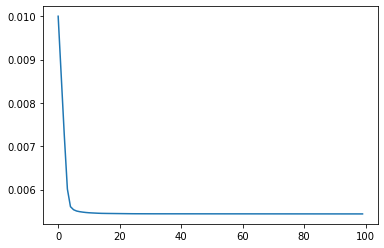

In [6]:
def compute_cost(X, y, W, regularization_factor):
    #this function calculates the hinge loss.
    #primal problem in SVM
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    return (1 / 2 * np.dot(W, W) + hinge_loss)

def calculate_gradient(X, y, W, regularization_factor):
        
    distance = 1 - (y * np.dot(X, W))
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):

        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
        
        dw += di
    
    dw = dw/len(y) 
    
    return dw

weights = np.zeros(3)
num_iterations = 100
learning_rate = .001
regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    cost = compute_cost(xTrain, yTrain, weights, regularization)
    print("Epoch", i + 1, "Cost is:", cost, "weights", weights)
    cost_list.append(cost)
    grad = calculate_gradient(xTrain, yTrain, weights, regularization)
    weights = weights - learning_rate * grad

plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [7]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights) >= 0.5, 1, 0)

# calculate accuracy
print("Accuracy Score:", accuracy_score(yTest, predict_svm(weights, xTest)))

# calculate precision, recall, and F1 score

print(classification_report(yTest, predict_svm(weights, xTest)))

Accuracy Score: 0.45901639344262296
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.46      1.00      0.63        28

    accuracy                           0.46        61
   macro avg       0.23      0.50      0.31        61
weighted avg       0.21      0.46      0.29        61



C:\Users\veron\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [10]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(penalty='none', fit_intercept=False)
model2.fit(xTrain,yTrain)
y_pred = model2.predict(xTest)

print('Accuracy score: {}'.format(accuracy_score(yTest,y_pred)))

print(classification_report(yTest,y_pred))
print("The accuracy of SVM using libraries is 0.5573770491803278 where as the accuracy of the Logistic Regression model is 0.0.6065573770491803.") 
print("This suggests that the Logistic Regression model performs better than the Support Vector Machine in terms of accuracy.")
print("The precision values are also higher in the Logisitic Regression model, where we get 63% and 58% for labels 0 and 1, respectively. These values are lower for SVM, which are 57% and 62% for labels 0 and 1, respectively") 
print('However, we do get a higher recall value with the SVM for label 0, which is 91% but 67% in the logistic regression. For label 1, the logistic regression produces a higher recall value of 54% compared to 18%.')
print('Lastly, the F1-score is slightly higher in SVM regression for label 0, at 70% but at 65% for Logistic Regression. The F1-score for label 1 is higher in the logistic regression at 56% but at 28% for SVM.')


Accuracy score: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        33
           1       0.58      0.54      0.56        28

    accuracy                           0.61        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.60      0.61      0.61        61

The accuracy of SVM using libraries is 0.5573770491803278 where as the accuracy of the Logistic Regression model is 0.0.6065573770491803.
This suggests that the Logistic Regression model performs better than the Support Vector Machine in terms of accuracy.
The precision values are also higher in the Logisitic Regression model, where we get 63% and 58% for labels 0 and 1, respectively. These values are lower for SVM, which are 57% and 62% for labels 0 and 1, respectively
However, we do get a higher recall value with the SVM for label 0, which is 91% but 67% in the logistic regression. For label 1, the logistic regression produces a


# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [11]:
svclassifier = svm.SVC(kernel='linear')
svclassifier.fit(xTrain, yTrain)
y_pred2 = svclassifier.predict(xTest)

print('Accuracy score for linear kernel: {}'.format(accuracy_score(yTest,y_pred2)))
print(classification_report(yTest, y_pred2))

svclassifier2 = svm.SVC(kernel='poly')
svclassifier2.fit(xTrain, yTrain)
y_pred3 = svclassifier2.predict(xTest)

print('Accuracy score for poly kernel: {}'.format(accuracy_score(yTest,y_pred3)))
print(classification_report(yTest, y_pred3))

print('Out of both accuracy scores between a linear kernel, RBF kernel (from task 1) and a poly kernel, we get a higher accuracy score using the linear kernel.')



Accuracy score for linear kernel: 0.6229508196721312
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        33
           1       0.57      0.71      0.63        28

    accuracy                           0.62        61
   macro avg       0.63      0.63      0.62        61
weighted avg       0.64      0.62      0.62        61

Accuracy score for poly kernel: 0.5409836065573771
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        33
           1       0.50      0.39      0.44        28

    accuracy                           0.54        61
   macro avg       0.53      0.53      0.53        61
weighted avg       0.53      0.54      0.53        61

Out of both accuracy scores between a linear kernel, RBF kernel (from task 1) and a poly kernel, we get a higher accuracy score using the linear kernel.
